In [1]:
%load_ext autoreload
%autoreload 2

import os,sys
import skimage.io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
from skimage.measure import regionprops, label
from skimage.morphology import reconstruction, thin, skeletonize, medial_axis
import collections
from collections import OrderedDict
from PIL import Image, ImageDraw
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from PIL import Image
import scipy
import pickle

In [2]:
image_dir = "./panda-36x256x256-tiles-data-spine/train/" 
mask_dir = "./panda-36x256x256-tiles-data-spine/masks/" 
csv_file = "./prostate-cancer-grade-assessment/train.csv"

In [3]:
df = pd.read_csv(csv_file)
img_ids = df['image_id'].tolist()
df = df.set_index('image_id')

In [82]:
len(img_ids)

10616

In [73]:
N = 36
slide_has_less_tiles = []
for img_id in tqdm(img_ids):
    count = 0
    while True:
        if os.path.exists(os.path.join(image_dir, f'{img_id}_{count}.png')):
            if count >= N:
#                 remove both the img and the mask
                os.remove(os.path.join(image_dir, f'{img_id}_{count}.png'))
                try:
                    os.remove(os.path.join(mask_dir, f'{img_id}_{count}.png'))
                except:
                    pass
            else:
                pass
        else:
            if count < N:
                slide_has_less_tiles.append(img_id)
            break
        count += 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
len(slide_has_less_tiles)

1

In [75]:
with open('slide_has_less_tiles.pkl', 'wb') as f:
    pickle.dump(slide_has_less_tiles, f)

In [76]:
with open('slide_has_less_tiles.pkl', 'rb') as f:
    data = pickle.load(f)

In [77]:
data

['3790f55cad63053e956fb73027179707']

01642d24ac5520681d6a20f6c42dc4fe radboud


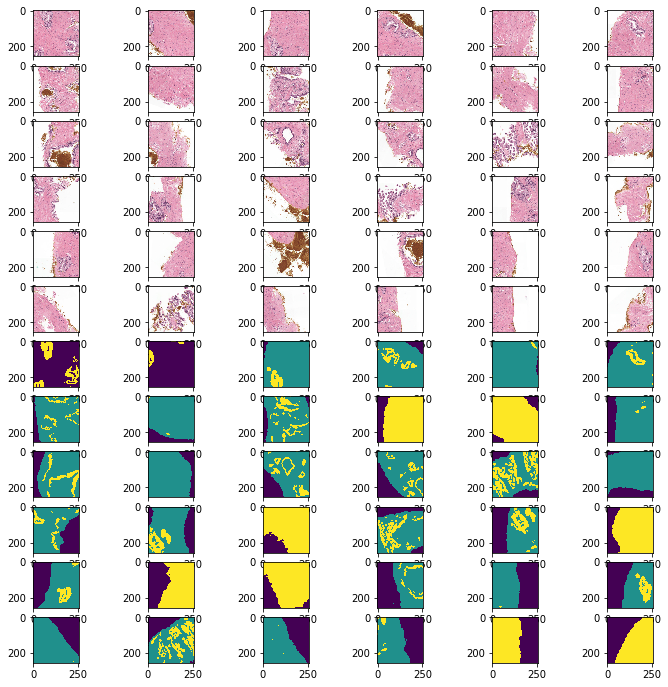

In [4]:
idx = np.random.choice(len(img_ids))
img_id = img_ids[idx]
img_id = "01642d24ac5520681d6a20f6c42dc4fe"
datacenter = df.loc[img_id, 'data_provider']
print(img_id, datacenter)
fig, ax = plt.subplots(nrows=12, ncols=6, figsize=(12, 12))
for i in range(36):
    tile = Image.open(os.path.join(image_dir, f'{img_id}_{i}.png')).convert('RGB')
    tile = np.asarray(tile)
    mask = Image.open(os.path.join(mask_dir, f'{img_id}_{i}.png')).convert('RGB')
    mask = np.asarray(mask)
    ax[int(i/6),int(i%6)].imshow(tile)
    ax[int(i/6) + 6,int(i%6)].imshow(mask[:,:,0])

In [52]:
np.unique(mask[:,:,0])

array([0], dtype=uint8)